In [147]:
import pandas as pd
teams = pd.read_csv("teams.csv")
teams

,team,country,year,events,athletes,age,height,weight,medals,prev_medals,prev_3_medals
0,AFG,Afghanistan,1964,8,8,22.0,161.0,64.2,0,0.0,0.0
1,AFG,Afghanistan,1968,5,5,23.2,170.2,70.0,0,0.0,0.0
2,AFG,Afghanistan,1972,8,8,29.0,168.3,63.8,0,0.0,0.0
3,AFG,Afghanistan,1980,11,11,23.6,168.4,63.2,0,0.0,0.0
4,AFG,Afghanistan,2004,5,5,18.6,170.8,64.8,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,2000,19,26,25.0,179.0,71.1,0,0.0,0.0
2140,ZIM,Zimbabwe,2004,11,14,25.1,177.8,70.5,3,0.0,0.0
2141,ZIM,Zimbabwe,2008,15,16,26.1,171.9,63.7,4,3.0,1.0
2142,ZIM,Zimbabwe,2012,8,9,27.3,174.4,65.2,0,4.0,2.3


In [250]:
teams= teams[["team","country","year", "athletes",  "prev_3_medals", "prev_medals","medals"]]
teams

,team,country,year,athletes,prev_3_medals,prev_medals,medals
0,AFG,Afghanistan,1964,8,0.0,0.0,0
1,AFG,Afghanistan,1968,5,0.0,0.0,0
2,AFG,Afghanistan,1972,8,0.0,0.0,0
3,AFG,Afghanistan,1980,11,0.0,0.0,0
4,AFG,Afghanistan,2004,5,0.0,0.0,0
...,...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,2000,26,0.0,0.0,0
2140,ZIM,Zimbabwe,2004,14,0.0,0.0,3
2141,ZIM,Zimbabwe,2008,16,1.0,3.0,4
2142,ZIM,Zimbabwe,2012,9,2.3,4.0,0


In [237]:
teams.corr()["medals"]

/var/folders/vf/3fzwlf6j5mgdhdjvjh9z2g5w0000gn/T/ipykernel_54695/3553819720.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  teams.corr()["medals"]


year            -0.034870
events           0.770646
athletes         0.839909
age              0.023231
prev_medals      0.920048
medals           1.000000
prev_3_medals    0.918438
Name: medals, dtype: float64

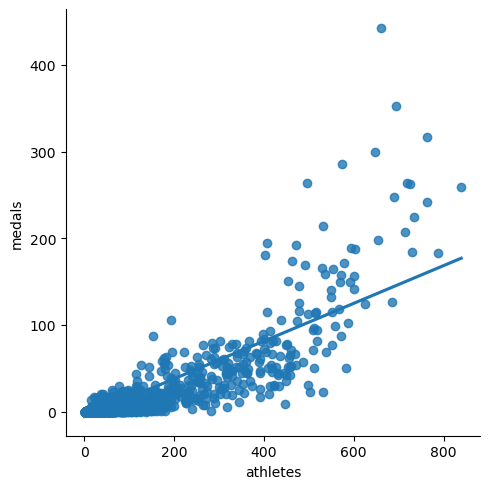

In [251]:
import seaborn as sns
sns.lmplot(data=teams, x='athletes', y='medals', fit_reg=True, ci=None)

<Axes: ylabel='Frequency'>

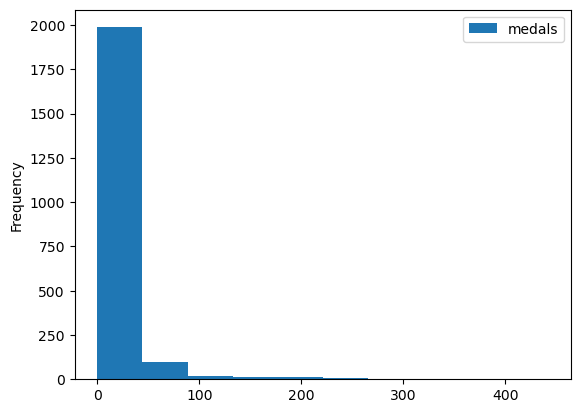

In [152]:
teams.plot.hist(y="medals")

In [153]:
teams=teams.dropna()
teams

,team,country,year,events,athletes,age,height,weight,prev_medals,medals,prev_3_medals
0,AFG,Afghanistan,1964,8,8,22.0,161.0,64.2,0.0,0,0.0
1,AFG,Afghanistan,1968,5,5,23.2,170.2,70.0,0.0,0,0.0
2,AFG,Afghanistan,1972,8,8,29.0,168.3,63.8,0.0,0,0.0
3,AFG,Afghanistan,1980,11,11,23.6,168.4,63.2,0.0,0,0.0
4,AFG,Afghanistan,2004,5,5,18.6,170.8,64.8,0.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,2000,19,26,25.0,179.0,71.1,0.0,0,0.0
2140,ZIM,Zimbabwe,2004,11,14,25.1,177.8,70.5,0.0,3,0.0
2141,ZIM,Zimbabwe,2008,15,16,26.1,171.9,63.7,3.0,4,1.0
2142,ZIM,Zimbabwe,2012,8,9,27.3,174.4,65.2,4.0,0,2.3


In [252]:
train=teams[teams["year"]<2012].copy()
test=teams[teams["year"]>=2012].copy()
train.shape



(1609, 7)

In [253]:
test.shape

(405, 7)

In [254]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [255]:
predictors = ["athletes","prev_3_medals","prev_medals"] 
target ="medals" 


In [256]:
reg.fit(train[predictors], train["medals"]) 

LinearRegression()

In [258]:
predictions = reg.predict(test[predictors]) 

In [259]:
test["predictions"]= predictions

In [261]:
test

,team,country,year,athletes,prev_3_medals,prev_medals,medals,predictions
6,AFG,Afghanistan,2012,6,0.3,1.0,1,-1.028851
7,AFG,Afghanistan,2016,3,0.7,1.0,0,-1.028788
24,ALB,Albania,2012,10,0.0,0.0,0,-1.338788
25,ALB,Albania,2016,6,0.0,0.0,0,-1.578581
37,ALG,Algeria,2012,39,2.3,2.0,1,2.263781
...,...,...,...,...,...,...,...,...
2111,YEM,Yemen,2016,3,0.0,0.0,0,-1.758425
2131,ZAM,Zambia,2012,7,0.0,0.0,0,-1.518632
2132,ZAM,Zambia,2016,7,0.0,0.0,0,-1.518632
2142,ZIM,Zimbabwe,2012,9,2.3,4.0,0,1.294931


In [262]:
test.loc[test["predictions"]<0,"predictions"] = 0 

In [264]:
test["predictions"] = test["predictions"].round() 

In [265]:
test

,team,country,year,athletes,prev_3_medals,prev_medals,medals,predictions
6,AFG,Afghanistan,2012,6,0.3,1.0,1,0.0
7,AFG,Afghanistan,2016,3,0.7,1.0,0,0.0
24,ALB,Albania,2012,10,0.0,0.0,0,0.0
25,ALB,Albania,2016,6,0.0,0.0,0,0.0
37,ALG,Algeria,2012,39,2.3,2.0,1,2.0
...,...,...,...,...,...,...,...,...
2111,YEM,Yemen,2016,3,0.0,0.0,0,0.0
2131,ZAM,Zambia,2012,7,0.0,0.0,0,0.0
2132,ZAM,Zambia,2016,7,0.0,0.0,0,0.0
2142,ZIM,Zimbabwe,2012,9,2.3,4.0,0,1.0


In [266]:
from sklearn.metrics import mean_absolute_error
error = mean_absolute_error(test["medals"], test["predictions"]) 

In [268]:
error

3.582716049382716

In [269]:
test[test["team"]=="USA"] 

,team,country,year,athletes,prev_3_medals,prev_medals,medals,predictions
2053,USA,United States,2012,689,274.0,317.0,248,294.0
2054,USA,United States,2016,719,276.0,248.0,264,268.0


In [270]:
errors=(test["medals"]-test["predictions"]).abs() 

In [271]:
errors

6       1.0
7       0.0
24      0.0
25      0.0
37      1.0
       ... 
2111    0.0
2131    0.0
2132    0.0
2142    1.0
2143    1.0
Length: 405, dtype: float64

In [272]:
error_by_team = errors.groupby(test["team"]).mean() 

In [273]:
error_by_team

team
AFG    0.5
ALB    0.0
ALG    1.0
AND    0.0
ANG    0.0
      ... 
VIE    1.0
VIN    0.0
YEM    0.0
ZAM    0.0
ZIM    1.0
Length: 204, dtype: float64

In [274]:
medals_by_team = test["medals"].groupby(test["team"]).mean() 

In [275]:
error_ratio = error_by_team / medals_by_team

In [276]:
error_ratio

team
AFG    1.000000
ALB         NaN
ALG    0.666667
AND         NaN
ANG         NaN
         ...   
VIE    1.000000
VIN         NaN
YEM         NaN
ZAM         NaN
ZIM         inf
Length: 204, dtype: float64

In [277]:
error_ratio[~pd.isnull(error_ratio)] 

team
AFG    1.000000
ALG    0.666667
ARG    1.048780
ARM    0.142857
AUS    0.545918
         ...   
USA    0.097656
UZB    0.625000
VEN    1.250000
VIE    1.000000
ZIM         inf
Length: 103, dtype: float64

In [278]:
import numpy as np
error_ratio = error_ratio[np.isfinite(error_ratio)] 

In [279]:
error_ratio

team
AFG    1.000000
ALG    0.666667
ARG    1.048780
ARM    0.142857
AUS    0.545918
         ...   
UKR    1.121951
USA    0.097656
UZB    0.625000
VEN    1.250000
VIE    1.000000
Length: 97, dtype: float64

In [280]:
test[test["team"]=="IND"] 

,team,country,year,athletes,prev_3_medals,prev_medals,medals,predictions
907,IND,India,2012,95,1.7,3.0,6,6.0
908,IND,India,2016,130,3.3,6.0,2,10.0


In [286]:
lr_confidence = reg.score(test[predictors], test[target])
print("lr confidence: ", lr_confidence)

lr confidence:  0.9012909469047294
